<h2 style="color:#4286f4">Explore cancer images</h2>

In [60]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook
from image_utils import read_image

In [61]:
DATA_PATH = '/Users/gzilbar/msc/side_projects/data/kaggle_1_data/data'
TRAIN_PATH = os.path.join(DATA_PATH, 'train')

<h4 style="color:#4286f4">Labels Distribution</h4>

In [62]:
labels_df = pd.read_csv(os.path.join(DATA_PATH, 'train_labels.csv'))
labels_df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

<h4 style="color:#4286f4">Visualize Images</h4>

In [63]:
def read_image(img_path):
    bgr_img = cv2.imread(img_path)
    # flip to rgb
    b, g, r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r, g, b])
    return rgb_img

Text(0, 0.5, 'Positive samples')

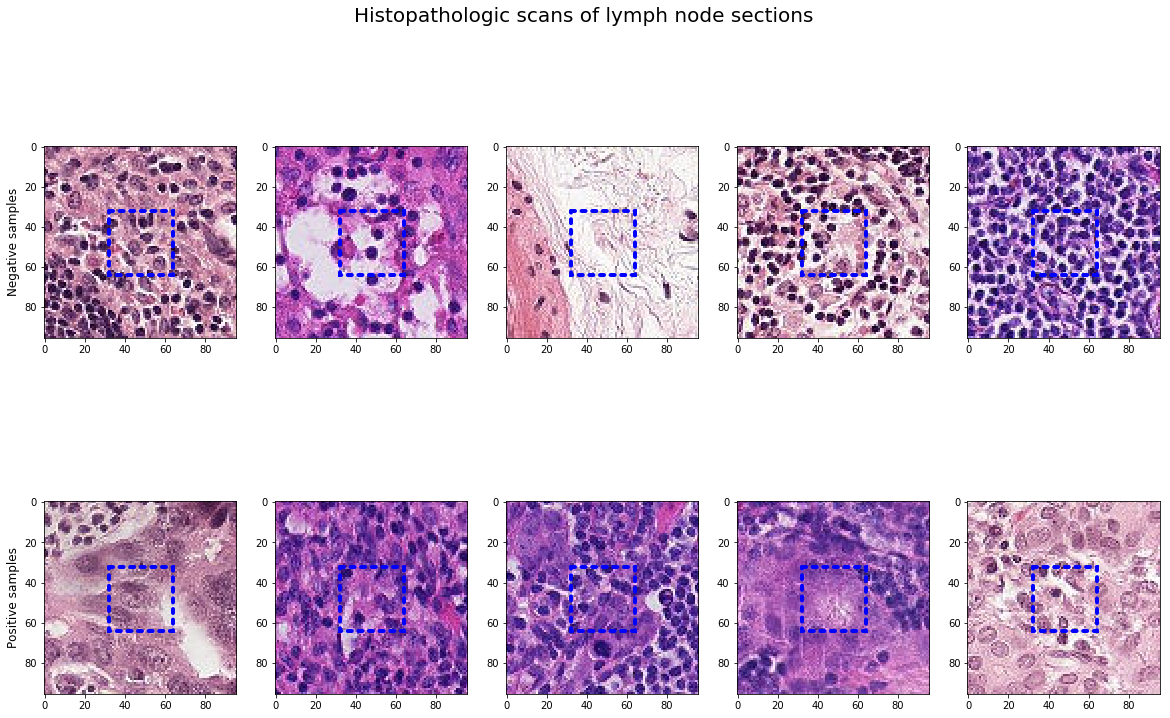

In [64]:
shuffled_labels = shuffle(labels_df)

fig, ax = plt.subplots(2, 5, figsize=(20,12))
fig.suptitle('Histopathologic scans of lymph node sections',
             fontsize=20)
# Negative samples
for i, idx in enumerate(shuffled_labels[shuffled_labels['label'] == 0]['id'][0:5]):
    img_path = os.path.join(TRAIN_PATH, idx)
    read_image(img_path + '.tif')
    ax[0, i].imshow(read_image(img_path + '.tif'))
    box = patches.Rectangle((32, 32), 32, 32, linewidth=4, edgecolor='b',
                            facecolor='none', linestyle=':', capstyle='round')
    ax[0, i].add_patch(box)
ax[0, 0].set_ylabel('Negative samples', size='large')
# positive samples
for i, idx in enumerate(shuffled_labels[shuffled_labels['label'] == 1]['id'][0:5]):
    img_path = os.path.join(TRAIN_PATH, idx)
    read_image(img_path + '.tif')
    ax[1, i].imshow(read_image(img_path + '.tif'))
    box = patches.Rectangle((32, 32), 32, 32, linewidth=4,
                            edgecolor='b', linestyle=':',
                            facecolor='none', capstyle='round')
    ax[1, i].add_patch(box)
ax[1, 0].set_ylabel('Positive samples', fontsize='large')
    

<div><b>Seems rather hard to draw any conclusions</b></div>
<div><b>Blue box indicates the area of decision - Perhaps worth cropping the image</b></div>

In [24]:
shuffled_labels = shuffle(labels_df)
a = enumerate(shuffled_labels[shuffled_labels['label'] == 0]['id'][0:5])
for b, c in a:
    print(b,c)

0 e2638568baa834d0e259496f797695f0ce3ec6c3
1 b5da98b295606f05ade183e3d683246e978021c1
2 3f16c0c5ce5da289d18a245356d5a165f7e7783c
3 d39df8a05f667f0317599fd9a7f55b33a1e5b42d
4 78ddf9f4968c20dd76c47841cda6932ab69067a6
